In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import tqdm
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('../data/with_features_more_features_all.csv')
df.dropna(inplace=True)
df.head()

,time,longitude,latitude,depth,mag,longitude_disc,latitude_disc,pos,lat_cent,lon_cent,plate_region,dist_region,dist,plate,diff_days,label
1,1973-01-02,-155.204333,19.326000,6.589,2.21,-156,19,19_-156,19.5,-155.5,22,3527.668174,3521.228924,22.0,1.0,0
2,1973-01-02,-155.253167,19.314833,7.041,1.93,-156,19,19_-156,19.5,-155.5,22,3527.668174,3525.575831,22.0,0.0,0
3,1973-01-03,-155.290167,19.399833,7.864,1.76,-156,19,19_-156,19.5,-155.5,22,3527.668174,3521.146991,22.0,1.0,0
4,1973-01-03,-155.273667,19.408500,13.166,1.94,-156,19,19_-156,19.5,-155.5,22,3527.668174,3519.272394,22.0,0.0,0
5,1973-01-03,-155.575000,19.181833,7.752,3.56,-156,19,19_-156,19.5,-155.5,22,3527.668174,3559.168484,22.0,0.0,0


In [18]:
SPLIT_DATE_TRAIN = "2020-01-01"
RADIUS = 300
df["time"] = pd.to_datetime(df["time"])

In [19]:
df["time"].quantile(0.851), df["time"].quantile(0.9733)

(Timestamp('2020-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'))

In [20]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return distance

In [21]:
def filter_regions(df: pd.DataFrame, threshold: int, radious: int) -> pd.DataFrame:
    df_f = df[df["time"] <= SPLIT_DATE_TRAIN]
    regions = []
    lens = []
    for pos in tqdm.tqdm(df_f["pos"].unique()):
        # tmp = df_f.copy(deep=True)
        lat, lon = pos.split("_")
        lat, lon = float(lat), float(lon)
        diff = int(radious / 111) + 3
        tmp = df_f[(df_f["latitude"] >= lat - diff) & (df_f["latitude"] <= lat + diff) & (df_f["longitude"] >= lon - diff) & (df_f["longitude"] <= lon + diff)]
        tmp["distance"] = haversine_distance(tmp["latitude"], tmp["longitude"], lat + 0.5, lon + 0.5)
        tmp = tmp[tmp["distance"] <= radious]
        if len(tmp) >= threshold:
            regions.append(pos)
            lens.append(len(tmp))
    return regions, lens

In [39]:
n = 100

In [23]:
counts1 = []
counts2 = []
for th in np.linspace(0, n, n // 5 + 1):
    regions, lens = filter_regions(df.copy(deep=True), th, RADIUS)
    counts1.append(len(regions))
    counts2.append(lens)

100%|██████████| 9299/9299 [05:40<00:00, 27.34it/s]


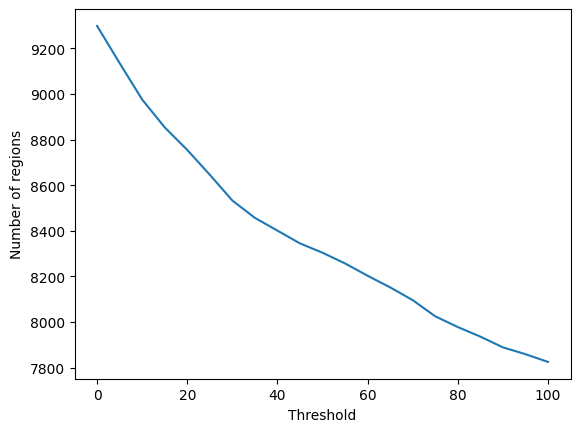

In [24]:
# plot counts
plt.plot(np.linspace(0, n, n // 5 + 1), counts1)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

In [43]:
n = 750

In [26]:
counts3 = []
counts4 = []
for th in np.linspace(0, n, n // 20 + 1):
    regions, lens = filter_regions(df.copy(deep=True), th, RADIUS)
    counts3.append(len(regions))
    counts4.append(lens)

  8%|▊         | 702/9299 [00:36<05:08, 27.90it/s]

100%|██████████| 9299/9299 [04:21<00:00, 35.53it/s]


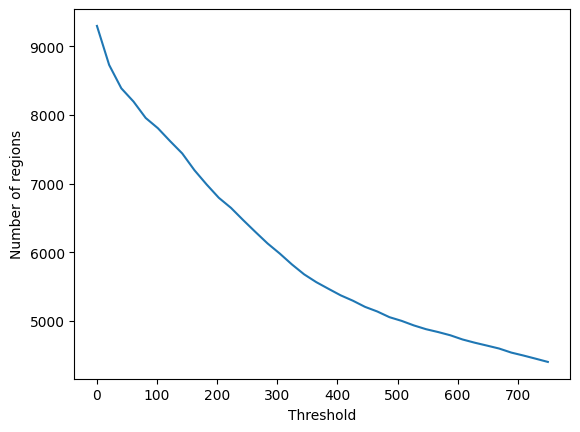

In [27]:
# plot counts
plt.plot(np.linspace(0, n, n // 20 + 1), counts3)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()

In [28]:
n = 3000

In [29]:
counts5 = []
counts6 = []
for th in np.linspace(0, n, n // 100 + 1):
    regions, lens = filter_regions(df.copy(deep=True), th, RADIUS)
    counts5.append(len(regions))
    counts6.append(lens)

  9%|▉         | 867/9299 [00:31<04:30, 31.13it/s]

100%|██████████| 9299/9299 [04:28<00:00, 34.68it/s]


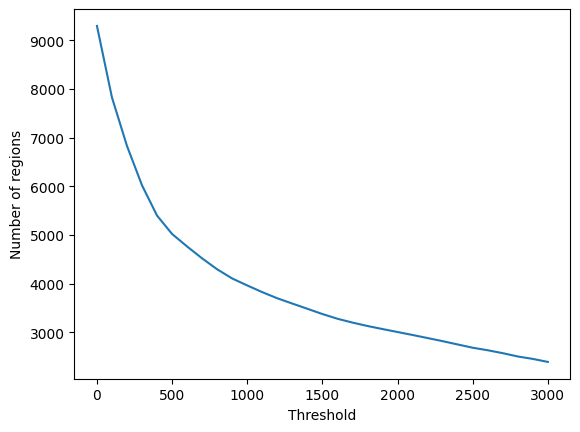

In [30]:
# plot counts
plt.plot(np.linspace(0, n, n // 100 + 1), counts5)
plt.xlabel("Threshold")
plt.ylabel("Number of regions")
plt.show()